## **Bank Marketing**

### Introduction
This dataset is based on the bank marketing

It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio - economic factors pertaining to the bank's operating country.

The classification goal is to predict if the client will subscribe a term deposit variable 'y'

Variables Information 

| **Variable**  | **Type**  | **Information**  |
|- |-|-|
| **age**  | numeric  | age of the client |
| **job**  | categorical  | type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| **marital**  | categorical  | marital status ('divorced','married','single'; note: 'divorced' means divorced or widowed)  |
| **education**  | categorical  | education details ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  |
| **default**  | categorical  | does the customer have credit in default ('no','yes') |
| **balance**  | numeric  | have balance   |
| **housing**  | categorical  | has house has loan ('no','yes') |
| **loan**  | categorical  | has personal loan ('no','yes') |
| **contact**  | categorical  | communication type ('cellular','telephone','unknown')  |
| **day**  | categorical  | last contact day of week ('mon','tue','wed','thu','fri') |
| **month**  | categorical  | last contact month ('jan', 'feb', 'mar', ..., 'nov', 'dec') |
| **duration**  | numeric  | last contact duration (in sec)  |
| **campaign**  | numeric  | numbers of contact performed  |
| **pdays**  | numeric  | days passed after last contact  |
| **previous**  | numeric  | number of contacts performed before campaign  |
| **poutcome**  | categorical  | outcome of previous marketing campaign  ('failure','nonexistent','success','unknown') |
| **y**  | categorical  | has the client subscribed a term deposit ('yes','no') |



Count of variables we have:

|**Type**|**Count**|
|-|-|
|categorical|11|
|numerical|6|

### Importing  required libraries

In [2]:
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# combining both data set test as well as train 
bank = pd.concat((pd.read_csv(r"C:\Users\mdali\Desktop\data_science\projects\Bank_Marketing\test.csv", sep=';'), 
                  pd.read_csv(r"C:\Users\mdali\Desktop\data_science\projects\Bank_Marketing\train.csv",sep=';')),
                  ignore_index=True)

In [4]:
# checking if all data got imported or not
bank.shape

(49732, 17)

In [5]:
# creating dummy variable
bank_new = bank.copy(deep=True) 

In [6]:
# dropping duplicates and assigning to new variable
bank_new = bank.drop_duplicates()

In [7]:
# amount of duplicate values
bank.shape[0]-bank_new.shape[0] 

4521

In [8]:
# new shape of our data
bank_new.shape

(45211, 17)

In [9]:
print('Number of observations : ', bank_new.shape[0]) # number of rows in dataset
print('Number of variables       : ', bank_new.shape[1]) # number of columns in dataset

Number of observations :  45211
Number of variables       :  17


##### Getting glimpse of data

In [10]:
# first five observation
bank_new.head() # first five observation

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
# last five observation
bank_new.tail() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
49731,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [12]:
# variables we have in our dataset
bank_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# checking for null values and variable data types
bank_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [14]:
# changing data types of wrong read variables accordingly
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y','day','month']
bank_new[cat_col]=bank_new[cat_col].astype('category', errors='coerce')

C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3420592766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_new[cat_col]=bank_new[cat_col].astype('category', errors='coerce')


In [15]:
# checking if data types changed or not
bank_new.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  category
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.9 MB


In [16]:
# statistical measures for numerical variables
bank_new.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


- here -1 in pdays might be those likely to be contacted

In [17]:
# statiscal measures for numerical variables
bank_new.describe(include='category')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959,39922


- unknown are present in many variables it might be our null values
- in poutcome more than 50% is unknown it must pending or something that needed to be confirmed

In [18]:
# selecting numeric variables
num_col = bank_new.select_dtypes(include='number').columns 

In [19]:
# checking if null values are present or not
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

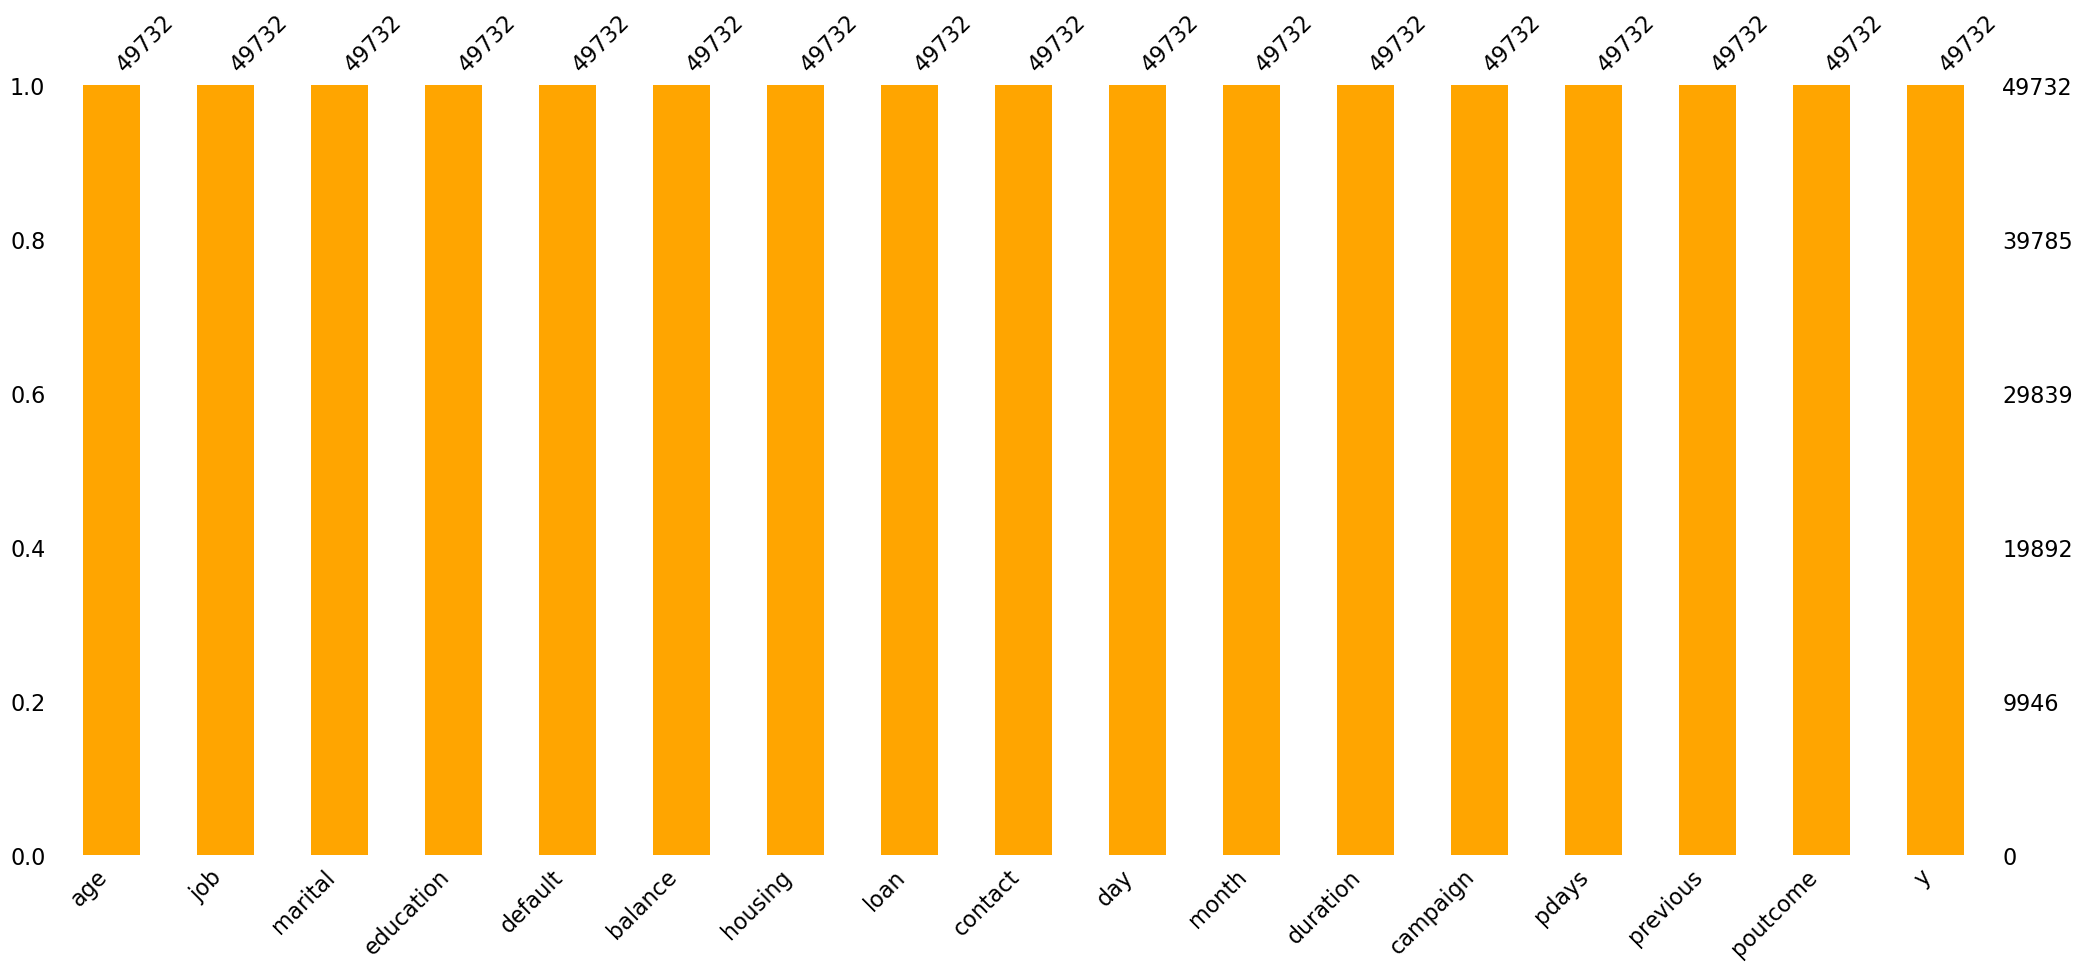

In [20]:
# config for visualizing null values
msno.bar(bank, color='orange')
# visualizing if we have null values or not
plt.show()  

In [21]:
# changing unknown to pending in poutcome variable
# bank_new['poutcome'] = bank_new['poutcome'].replace({ 'unknown':'pending'})
# changing unknown of othervariables to NaN values
bank_new = bank_new.replace({ 'unknown':np.nan})

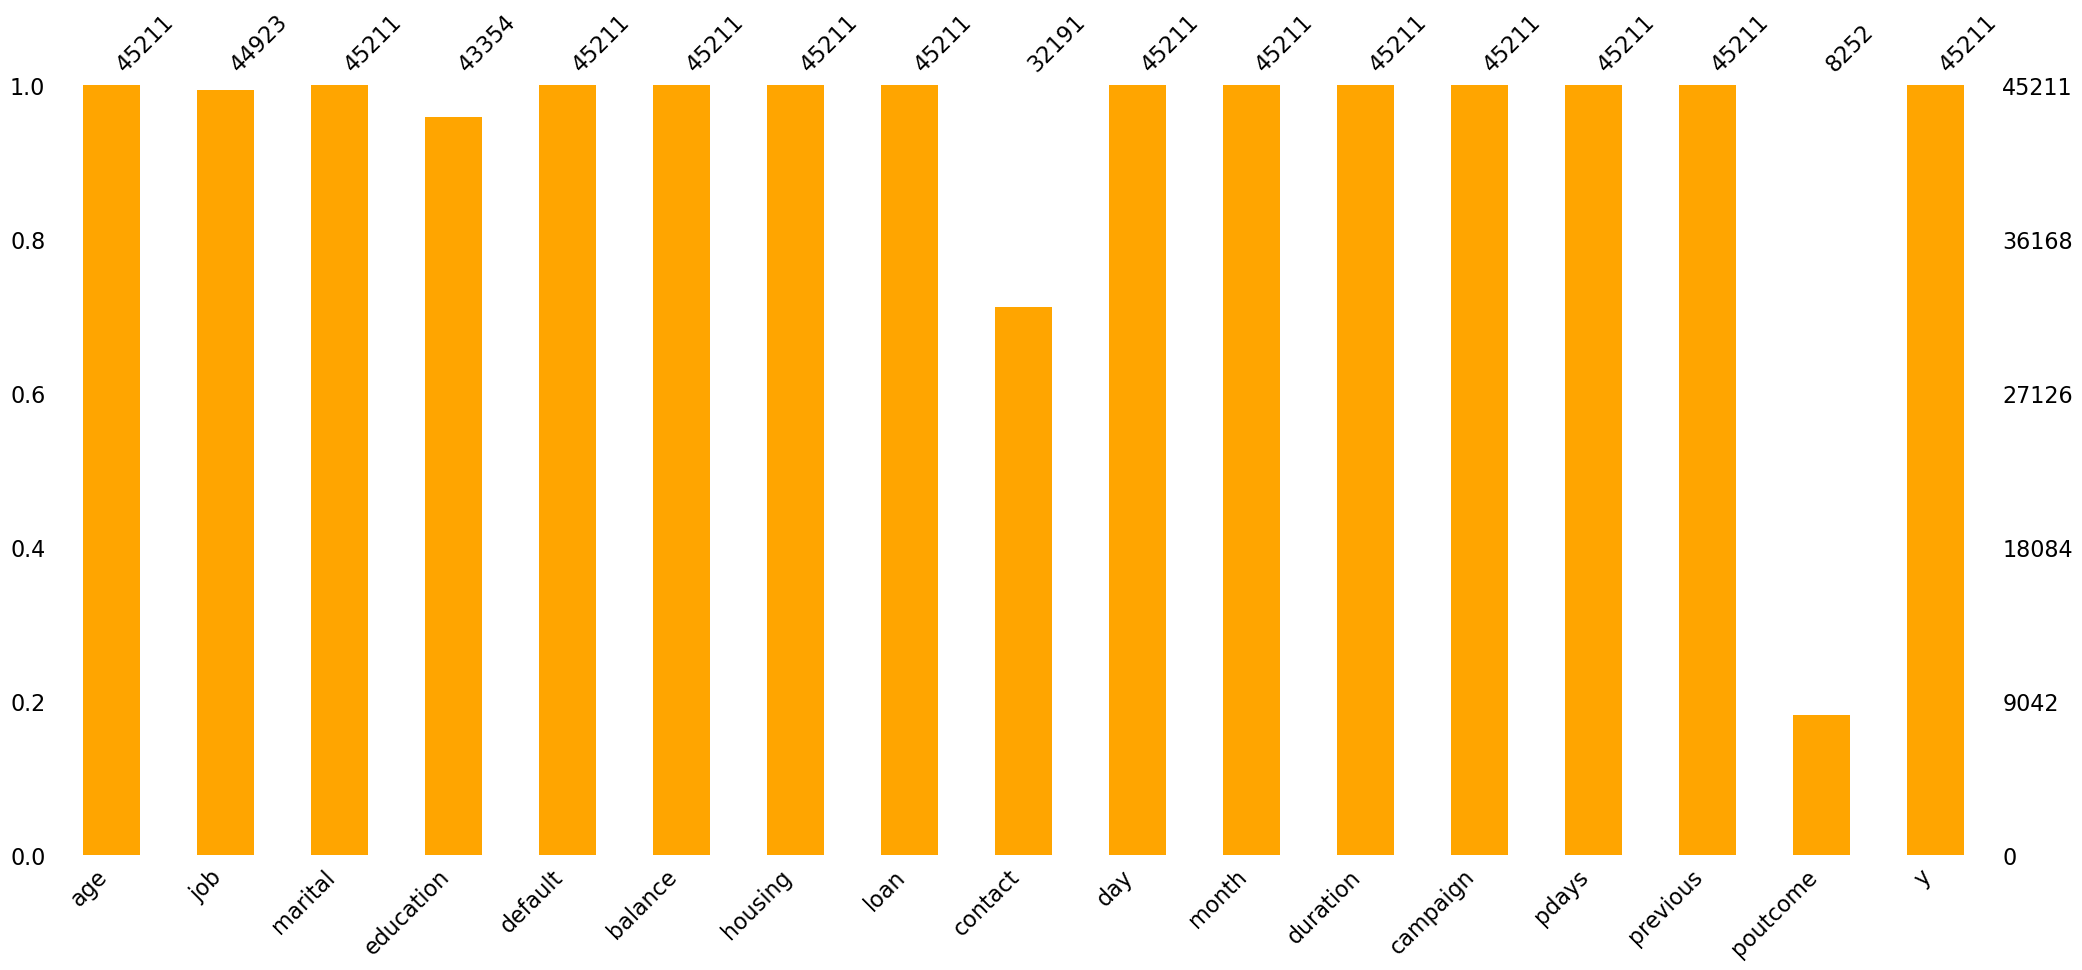

In [22]:
# config for visualizing null values
msno.bar(bank_new, color='orange') 
# visualizing if we have null values or not
plt.show()

- now we can see that there are null values present in the dataset

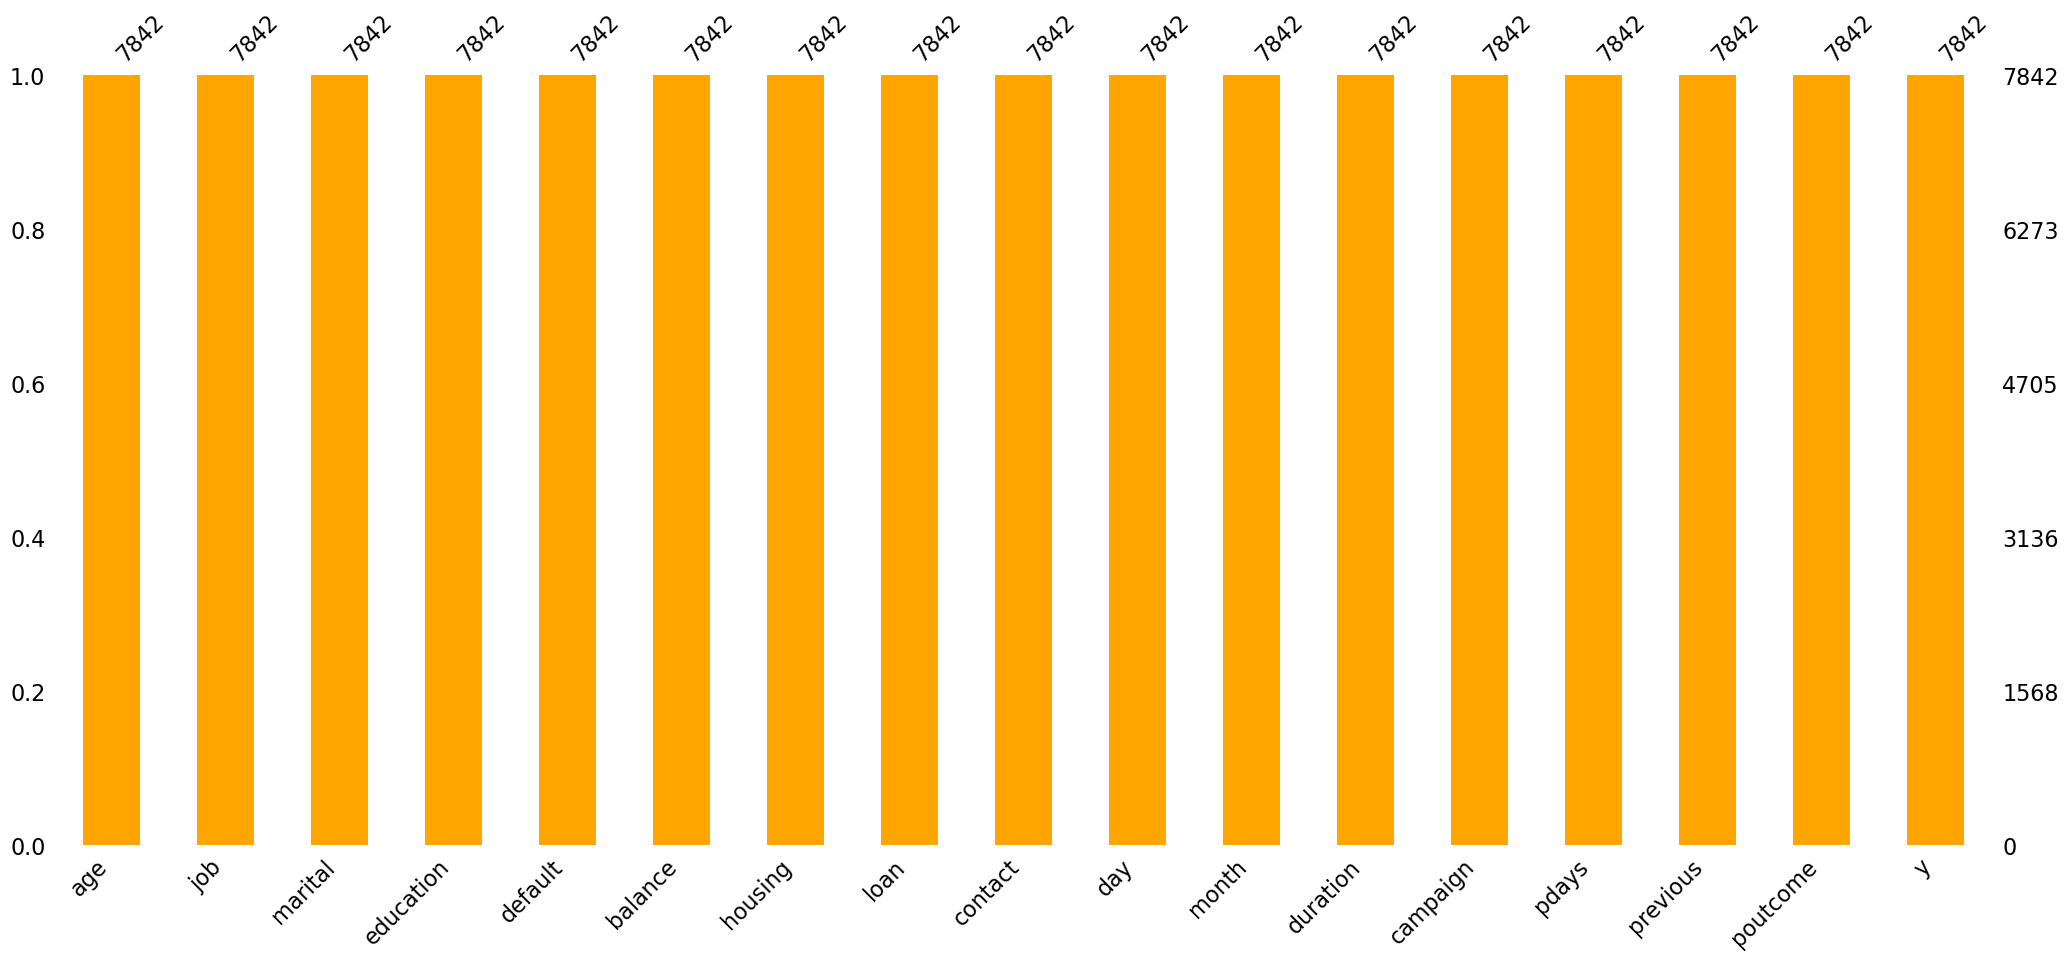

In [23]:
# dropping all null values
bank_new = bank_new.dropna() 
# config for visualizing null values
msno.bar(bank_new, color='orange')
# visualizing if we have null values or not 
plt.show() 

- now we don't have any null values in our dataset as we have dropped them

In [24]:
# number of uniqueness in category column
bank[cat_col].nunique() 

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
poutcome      4
y             2
day          31
month        12
dtype: int64

In [25]:
# number of uniqueness in numeric column
bank[num_col].nunique()

age           77
balance     7168
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

### Distribution of categorical variables

C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\1022647636.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,count) # 4 rows 3 columns
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\1022647636.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # compacting the layout


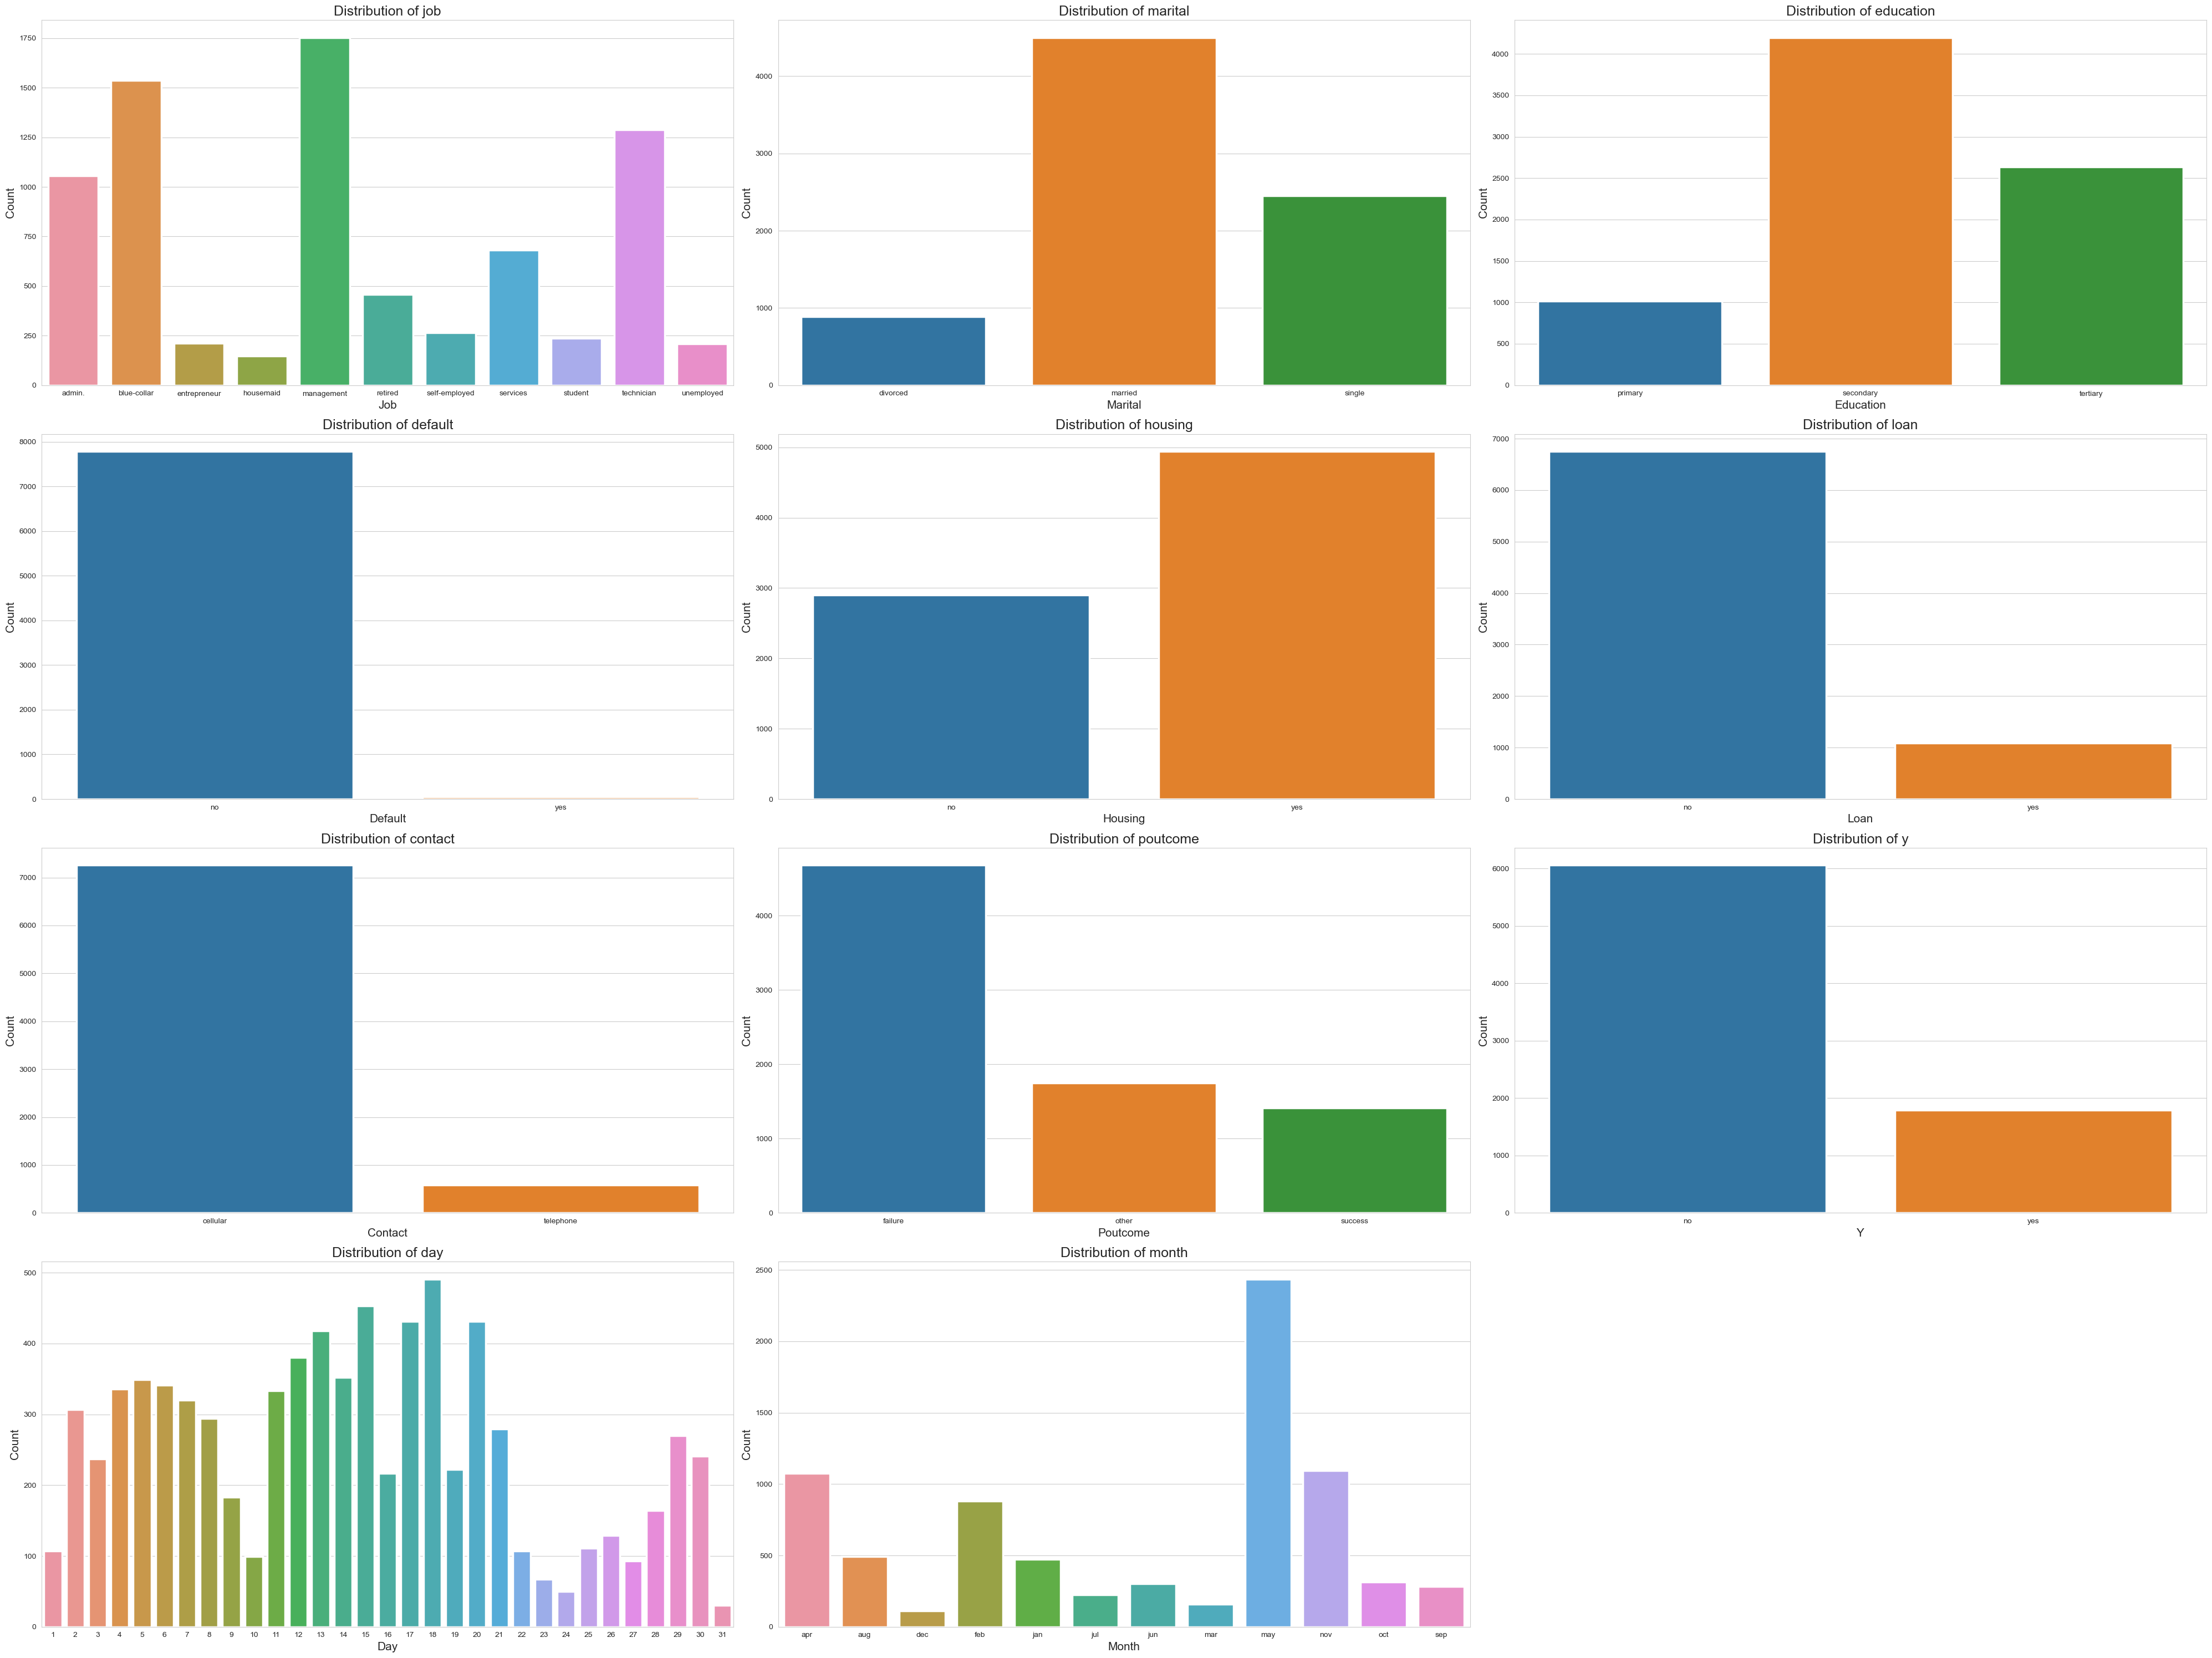

In [26]:
sns.set_style('whitegrid') # setting background colour
count=1 # for changing the rows
plt.subplots(figsize=(40, 30)) # inner plot size
for i in cat_col:
    plt.subplot(4,3,count) # 4 rows 3 columns 
    ax = plt.gca()
    sns.countplot(data=bank_new,x=i, linewidth=2.5) # countplot config
    ax.set_title(f'Distribution of {i}', fontsize =18) # title and it's size
    ax.set_xlabel(i.capitalize(),fontsize = 15) # label of x and it's size
    ax.set_ylabel('Count', fontsize = 15) # label of y and it's size
    count+=1 
    plt.tight_layout() # compacting the layout
plt.show() # visualizing the count plot

##### **Conclusion**
- management, blue-collar, technician jobs have more popularity
- similarly Married clients, 
- clients having secondary education, 
- clients having no credit, 
- clients having no loan, 
- pending clients have more popularity 

### Distribution of numerical variables

C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,count) # 4 rows 3 columns
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # compacting the layout
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # compacting the layout
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # compacting the layout
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # compacting the layout
C:\Users\mdali\AppData\Local\Temp\ipykernel_7812\3425640642.py

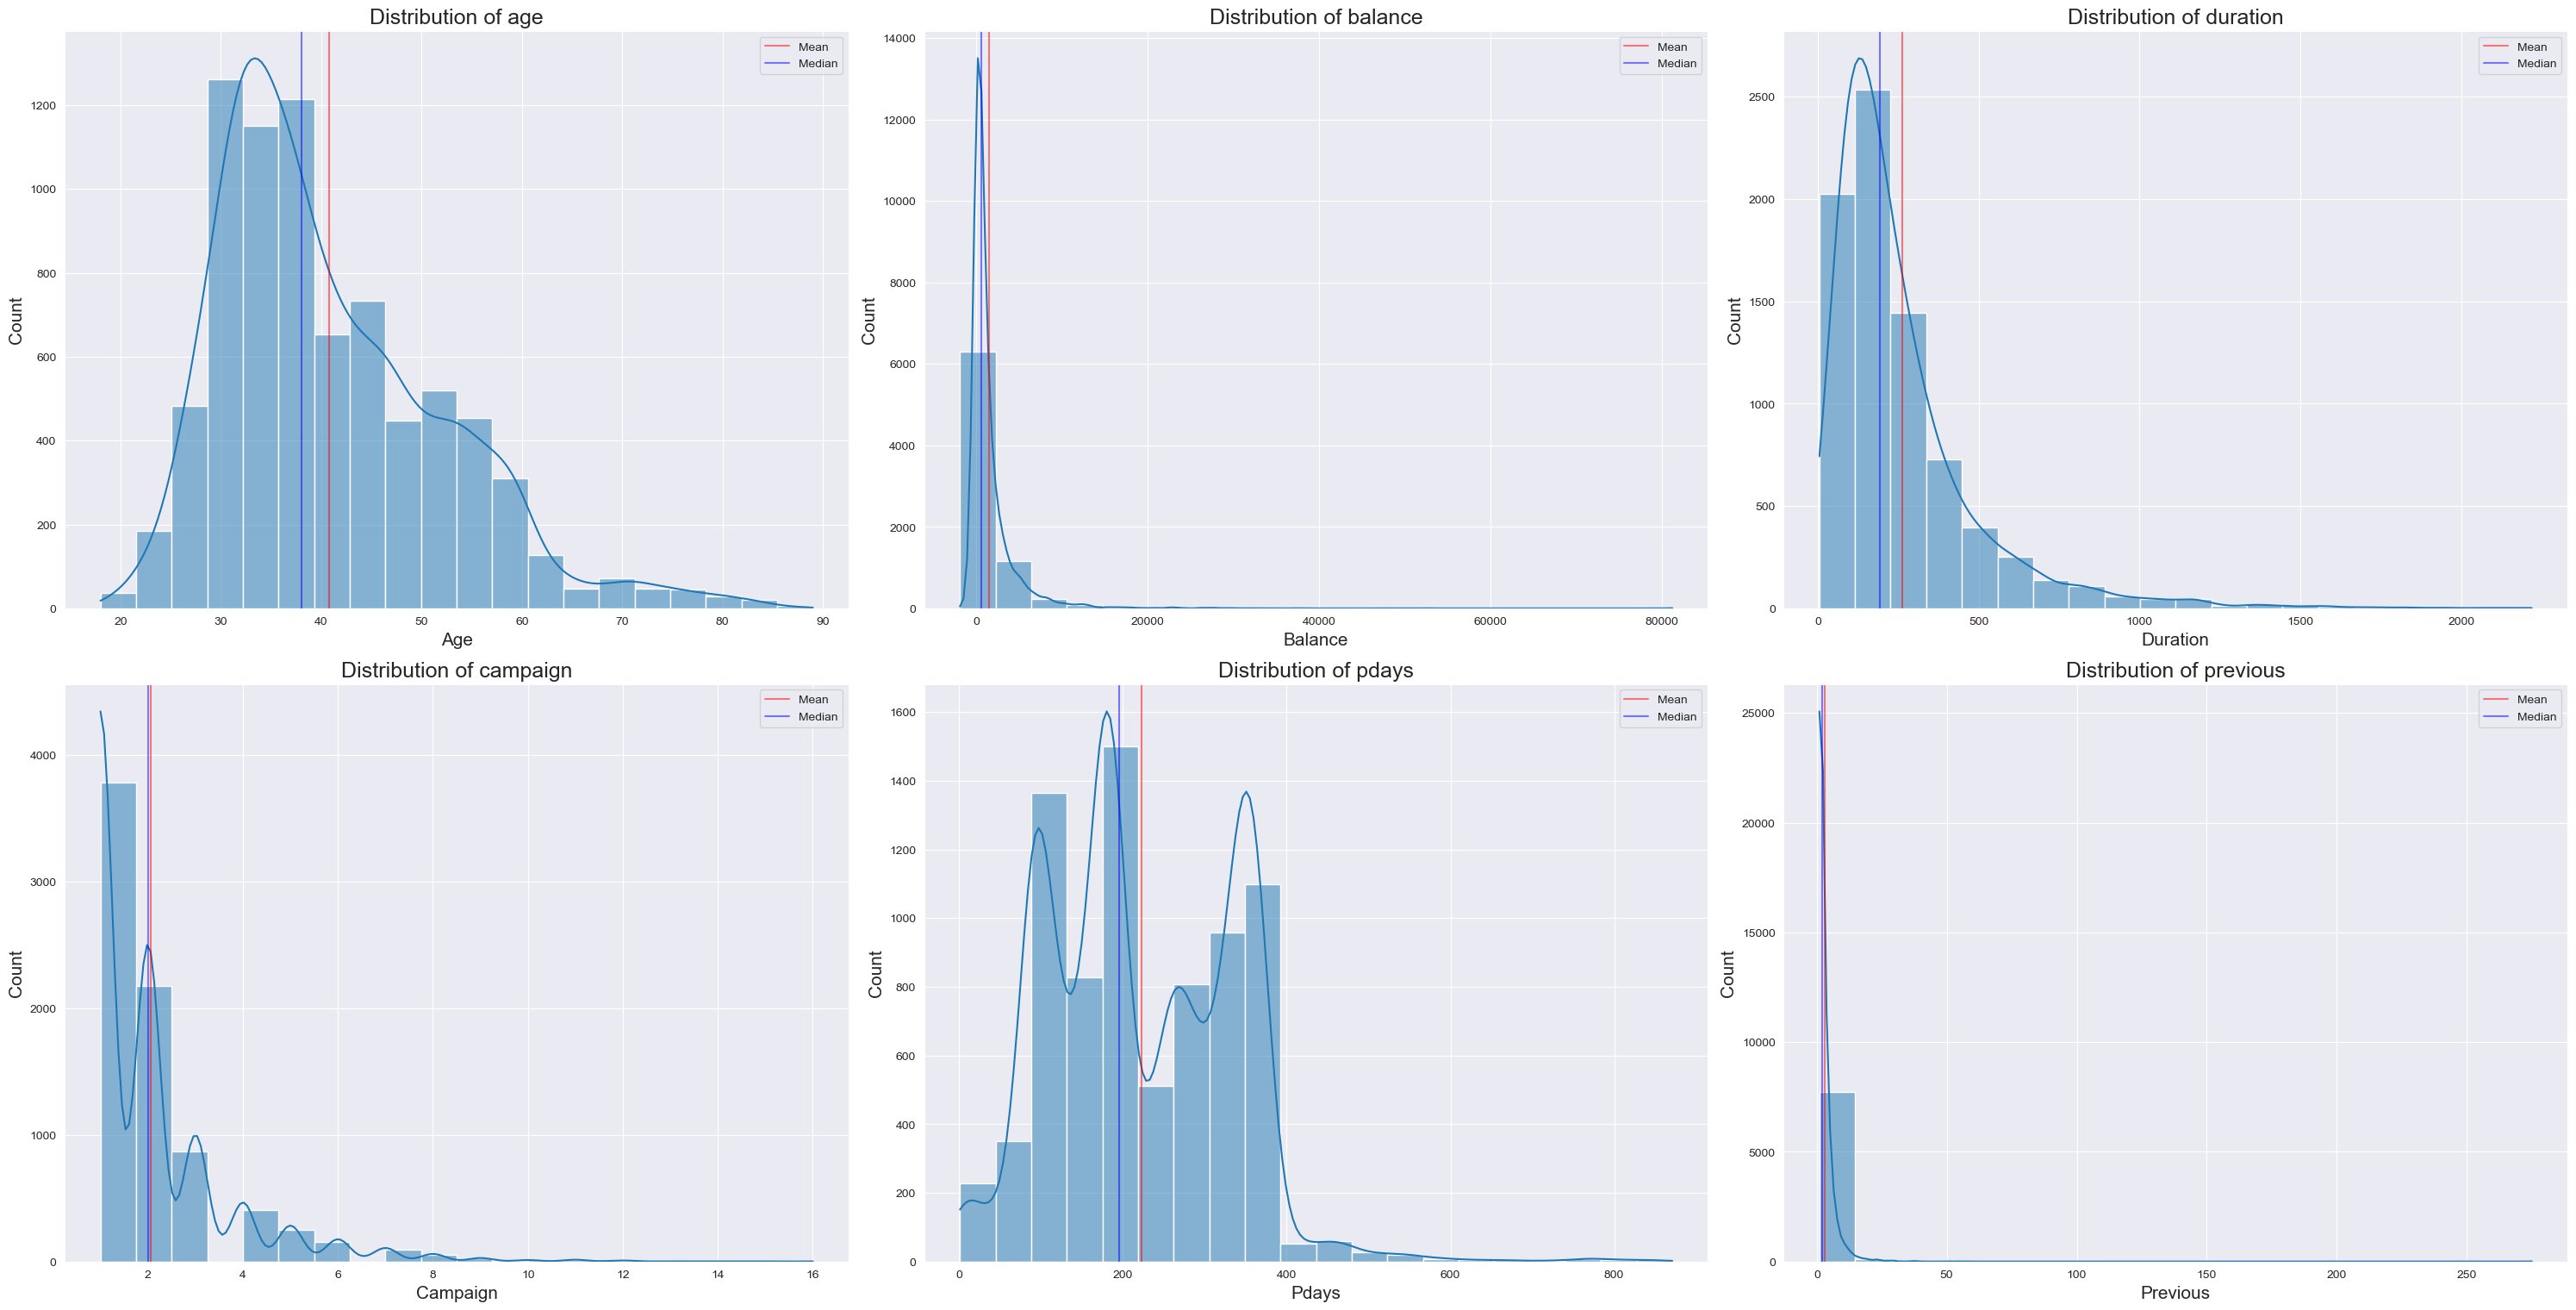

In [27]:
sns.set_style('darkgrid') # setting background colour
count=1 # for changing the rows
plt.subplots(figsize=(30, 30)) # inner plot size
for i in num_col:
    plt.subplot(4,3,count) # 4 rows 3 columns 
    ax = plt.gca()
    sns.histplot(data=bank_new,x=i,bins = 20, kde=True) # histogram plot config
    plt.axvline(x=bank_new[i].mean(), color='red', alpha=0.5, label= 'Mean') # creating mean line
    plt.axvline(x=bank_new[i].median(), color='blue', alpha=0.5, label= 'Median') # creating median line
    ax.set_title(f'Distribution of {i}', fontsize=18) # title of graphs
    ax.set_xlabel(i.capitalize(),fontsize = 15) # label of x and it's size
    ax.set_ylabel('Count', fontsize = 15) # label of y and it's size
    count+=1 
    plt.tight_layout() # compacting the layout
    plt.legend() # giving legend in plot mean and median
plt.show() # visualizing the count plot

### skewness

In [28]:
# skewness for numerical values
bank_new[num_col].skew() 

age          0.974708
balance      8.242972
duration     2.568750
campaign     2.425745
pdays        0.514057
previous    27.995396
dtype: float64

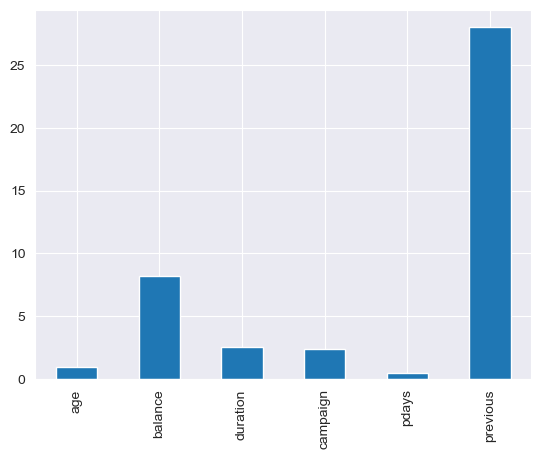

In [29]:
# visualizing skewness values in bar plot
bank_new[num_col].skew().plot(kind='bar') 
plt.show()

##### **Conclusion**
| **skew** | **range**| **variable** |
| - | - | - |
| **highly** | <-1 & >1 | balance, duration, campaign, pdays|
| **moderate** | (-1 to -0.5) & (o.5 to 1)| age |
| **symmetrical** | -0.5 to 0.5 | |

In [30]:
# transforming data using cube root transformatin
cbrt_bank = bank_new[num_col].transform('cbrt')
# bank_log[num_col].skew().plot(kind='bar') # visualizing skewness values
# plt.show()
cbrt_bank[num_col].skew()

age         0.532538
balance    -0.138915
duration    0.513030
campaign    1.204254
pdays      -0.850840
previous    1.667701
dtype: float64

side by side comparison before and after transforming

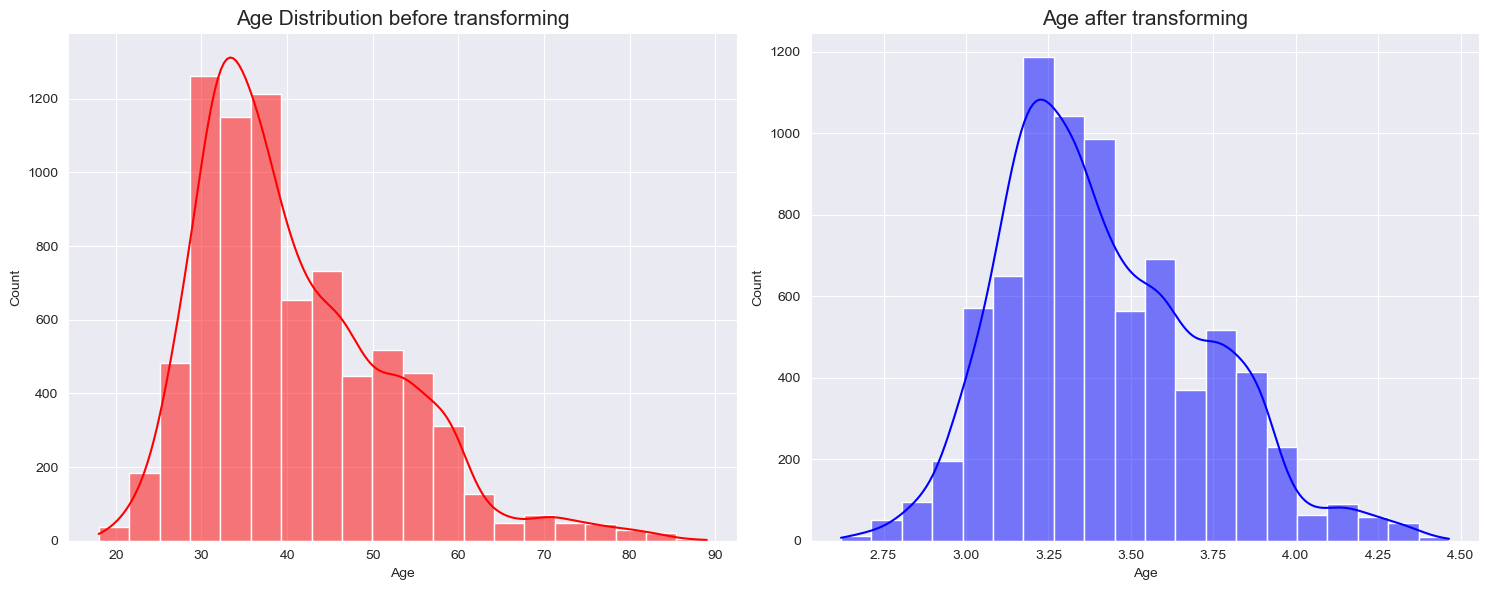

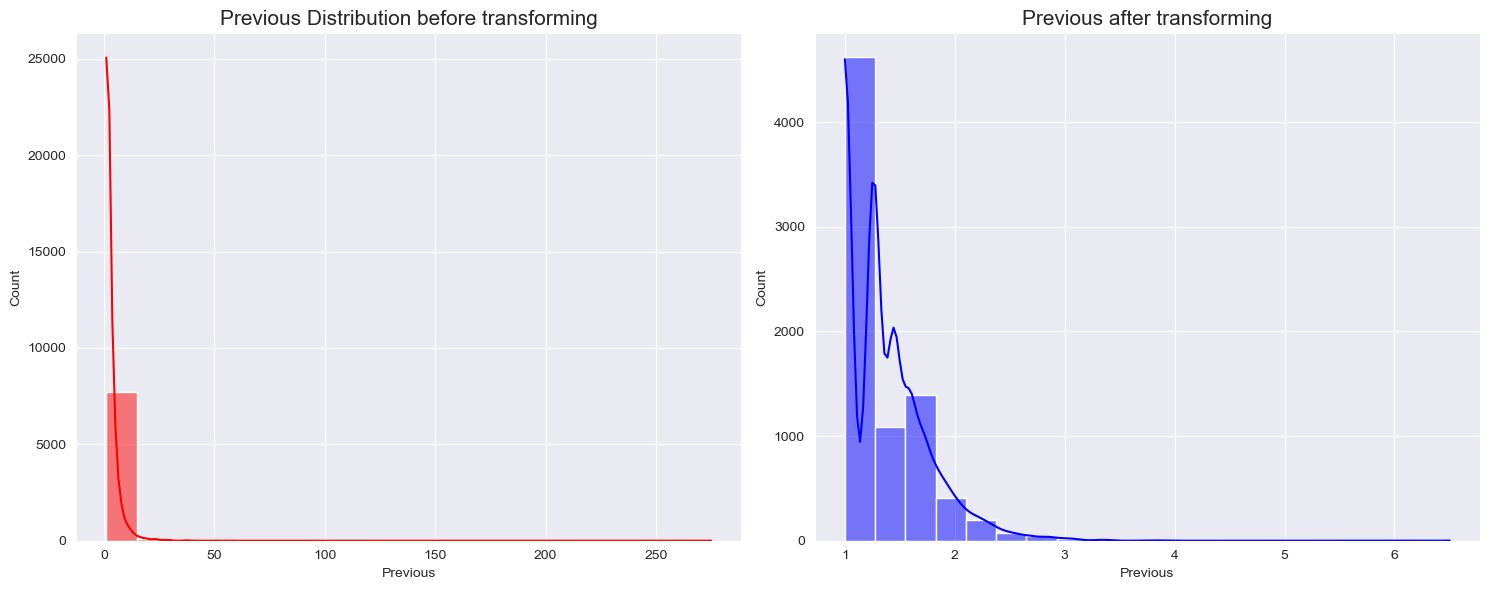

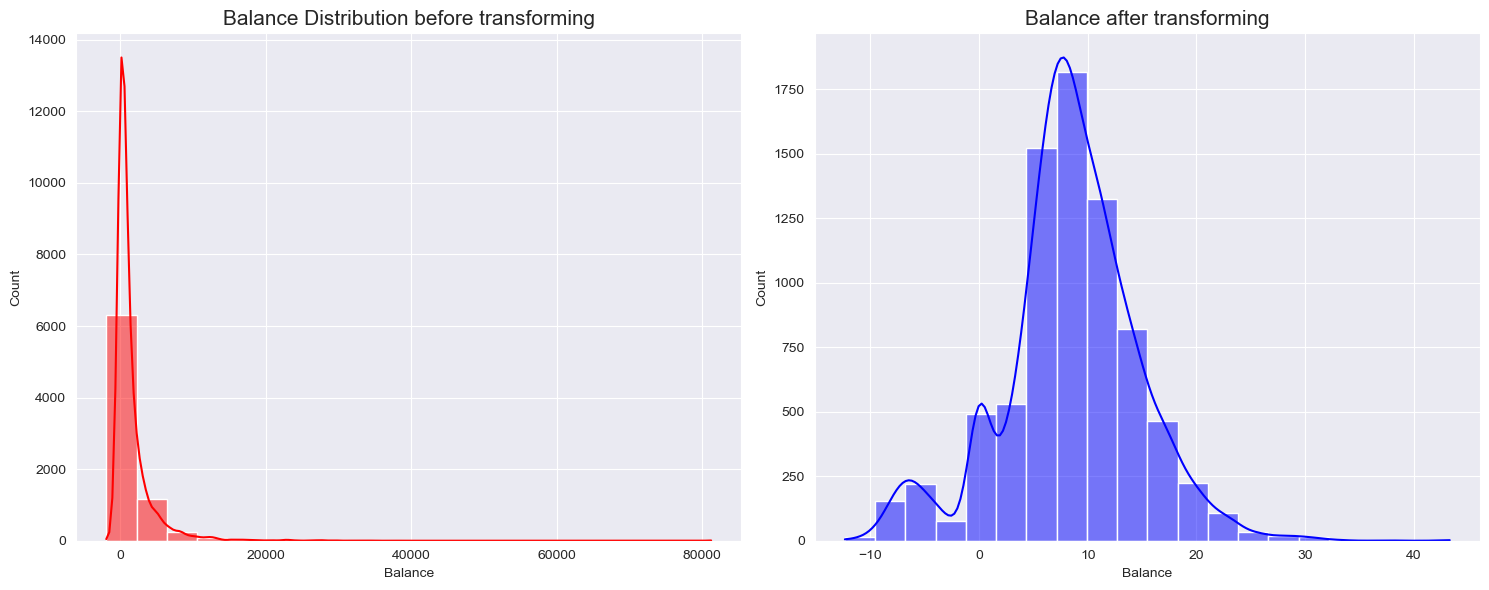

In [31]:
side_by_side = ['age','previous','balance'] # variable to be used 
for i in side_by_side:
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6)) # setting two columns of given sizes
    sns.histplot(data=bank_new,x=i,bins = 20, kde=True, ax=ax1, color='r') # config of histogram plot
    ax1.set_xlabel(i.capitalize(), fontsize=10) # setting x label
    ax1.set_ylabel('Count', fontsize=10) # setting y label
    ax1.set_title(f'{i.capitalize()} Distribution before transforming', fontsize=15) # setting title for plots
    ax1.tick_params(labelsize=10)

    sns.histplot(data=cbrt_bank,x=i,bins = 20, kde=True, ax=ax2,color='b')  # config of histogram plot
    ax2.set_xlabel(i.capitalize(), fontsize=10)  # setting x label
    ax2.set_ylabel('Count', fontsize=10)  # setting y label
    ax2.set_title(f'{i.capitalize()} after transforming', fontsize=15) # setting title for plots
    ax2.tick_params(labelsize=10) # setting size of graph fonts 
    
    plt.subplots_adjust(wspace=0.5) # space between two plots
    plt.tight_layout() # compactness of layout

- transforming data couldn't give us that much inference but for some variable it worked  

### Comparison of some important Categorical variables with Numerical variables

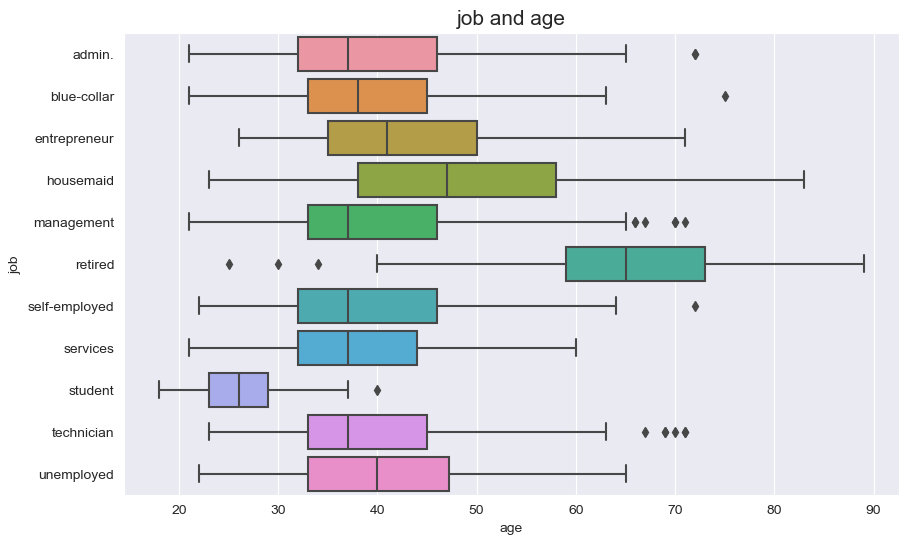

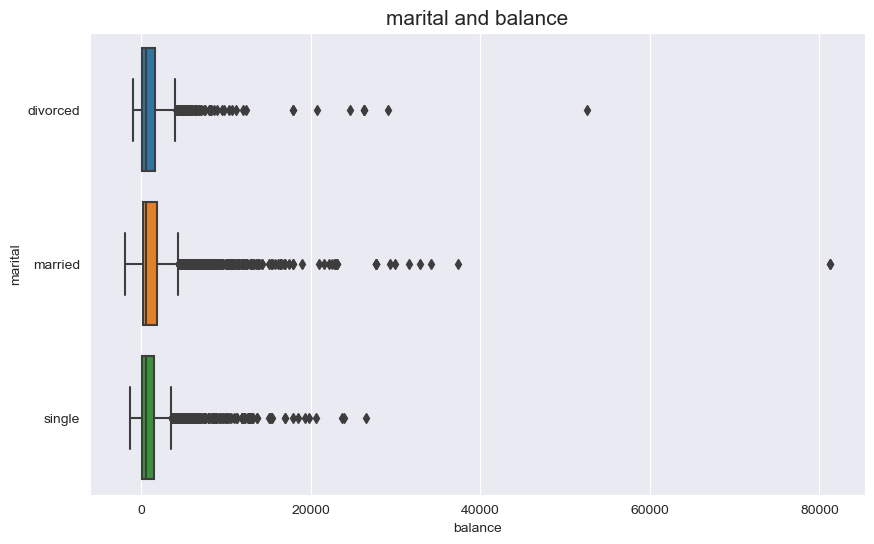

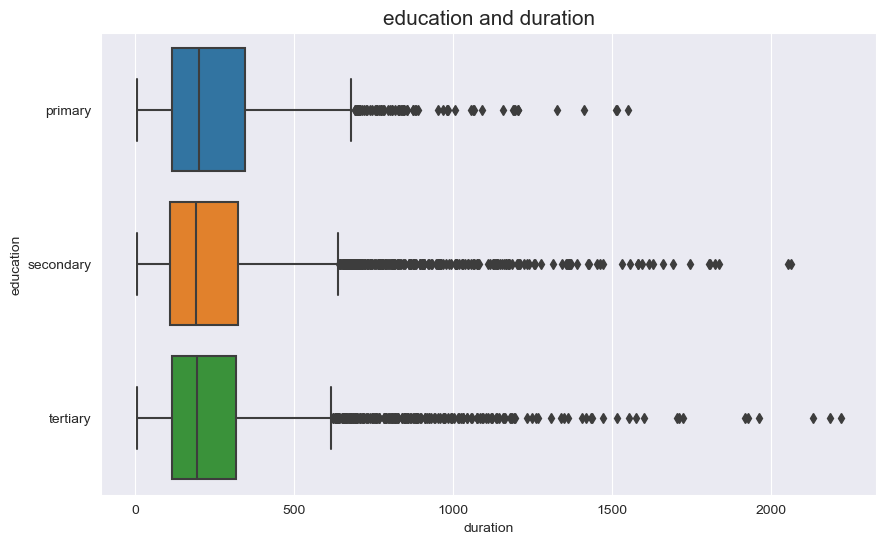

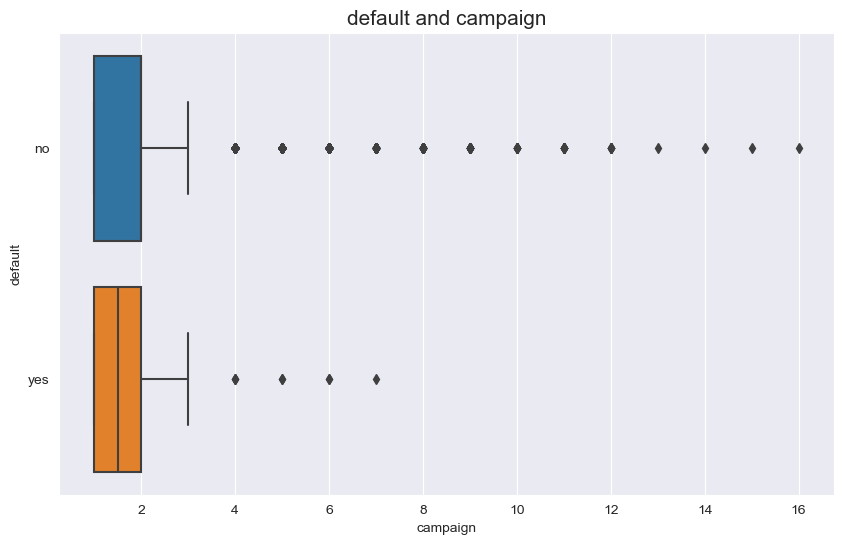

In [32]:
for i,j in zip(cat_col,num_col): 
    if i == 'housing':
        break
    plt.figure(figsize=(10,6))
    sns.boxplot(data=bank_new, y=i, x=j)
    plt.title(f'{i} and {j}', fontsize=15)
    plt.show()

Outliers calculation

In [33]:
for i in num_col:
    q1,q3 = np.percentile(bank_new[i],(25,75)) # finding q1 and q3
    iqr = round((q3-q1),2) # finding iqr
    upper_whisker = q3 + (1.5*iqr) # upper value
    lower_whisker = q1 - (1.5*iqr) # lower value
    bank_new[bank_new[i]>upper_whisker][i]
    bank_new[bank_new[i] < lower_whisker][i]
    outliers = bank_new[bank_new[i]>upper_whisker][i]
    print(f'Outliers in {i}', round((len(outliers)/bank_new.shape[0])*100, 2), '%') # finding percentage rounding to it two decimal places
    

Outliers in age 2.42 %
Outliers in balance 9.7 %
Outliers in duration 6.49 %
Outliers in campaign 12.85 %
Outliers in pdays 0.37 %
Outliers in previous 5.48 %


##### **Conclusion**
- as values have too many outliers it's hard to say anything about them

In [34]:
# out = ['age', 'duration', 'campaign']

### Comparison of Numerical variables

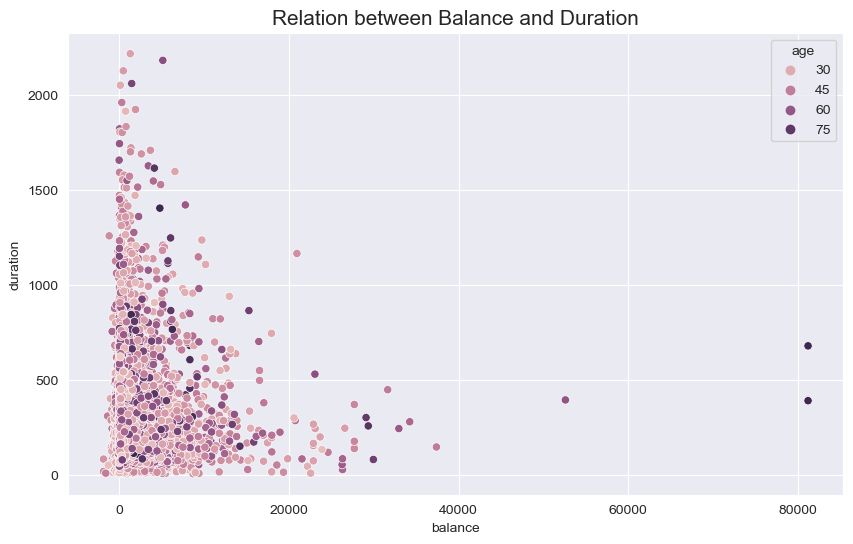

In [35]:
plt.figure(figsize=(10,6)) # size of plots
sns.scatterplot(data=bank_new, x = 'balance', y ='duration',hue= 'age') # config of scatter plot
plt.title(f'Relation between Balance and Duration', fontsize=15) # setting title and its size
plt.show() # visualizing the graph

- clients having less balance are generally of 30 - 40 in age and have been more on calls

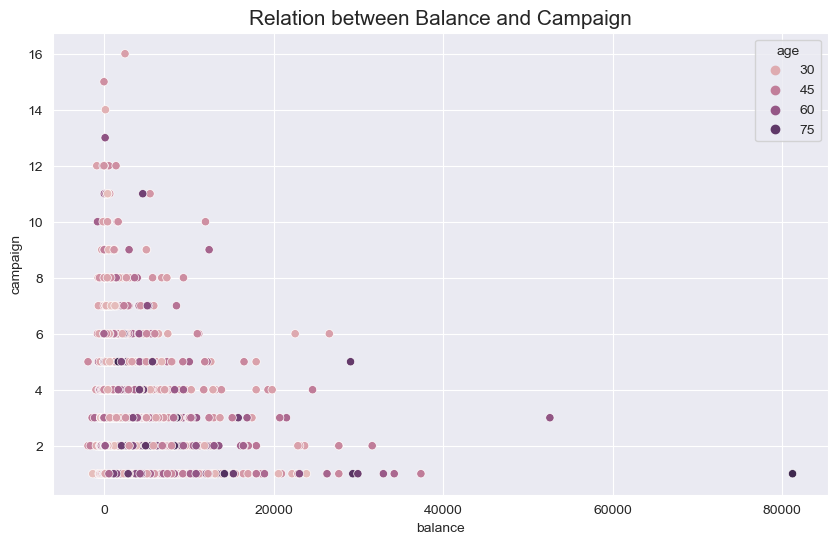

In [36]:
plt.figure(figsize=(10,6)) # size of plots
sns.scatterplot(data=bank_new, x = 'balance', y ='campaign', hue='age')  # config of scatter plot
plt.title(f'Relation between Balance and Campaign', fontsize=15) # setting title and its size
plt.show() # visualizing the graph

- this confirms that clients having less balance are generally of 30 - 40 in age and have been contacted more


### Distribution of variables with respect to term deposit


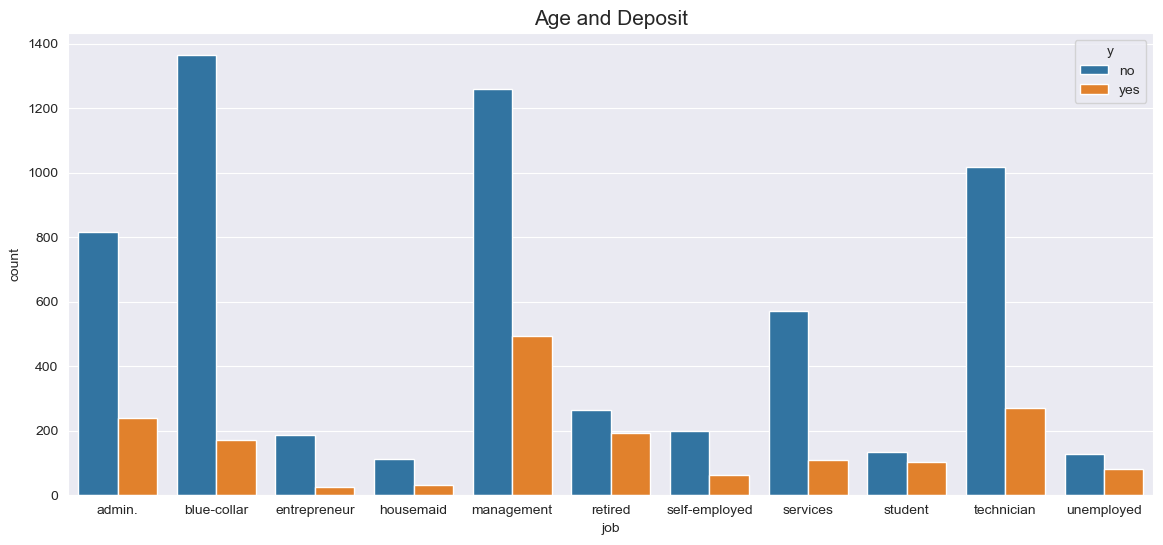

In [37]:
plt.figure(figsize=(14,6)) # size of plots
sns.countplot(data=bank_new, x='job', hue='y') # config of count plot
plt.title('Age and Deposit', fontsize=15) # setting title and its size
plt.show() # visualizing the graph

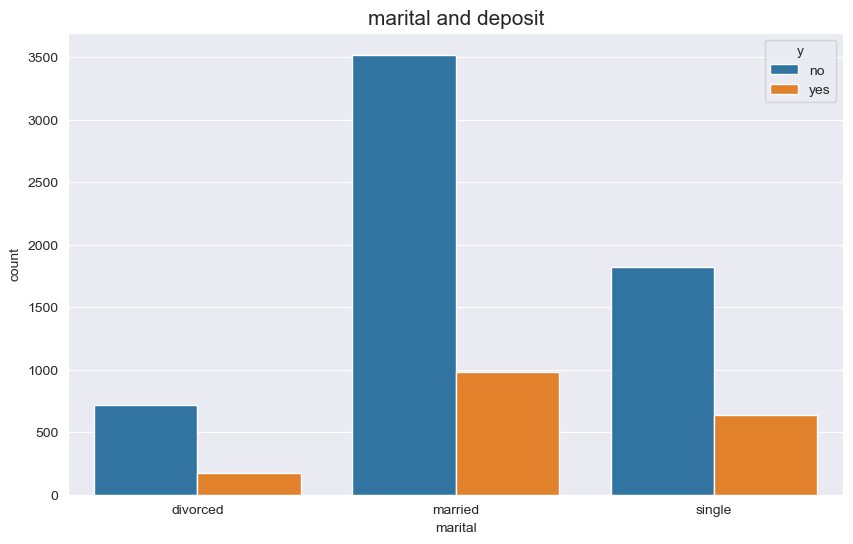

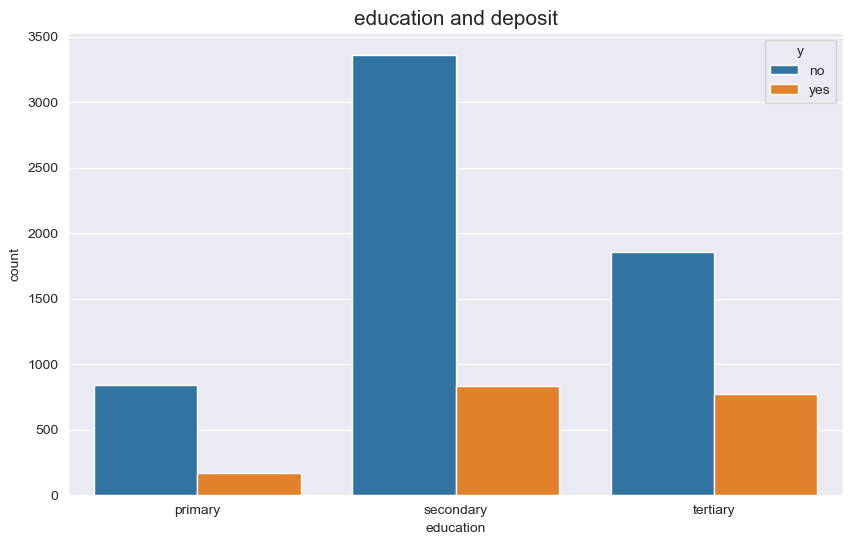

In [38]:
for i in ['marital', 'education']: # looping through the list
    plt.figure(figsize=(10,6)) # size of plots
    sns.countplot(data=bank_new, x=i, hue='y') # config of count plot
    plt.title(f'{i} and deposit',fontsize=15) # setting title and its size
    plt.show() # visualizing the graph

- Clients with blue collar, management, technician are less likely to subscribe for term deposit
- Married clients are less likely to subscribe for term deposit
- Secondary educated clients are less likely to subscribe for term deposit

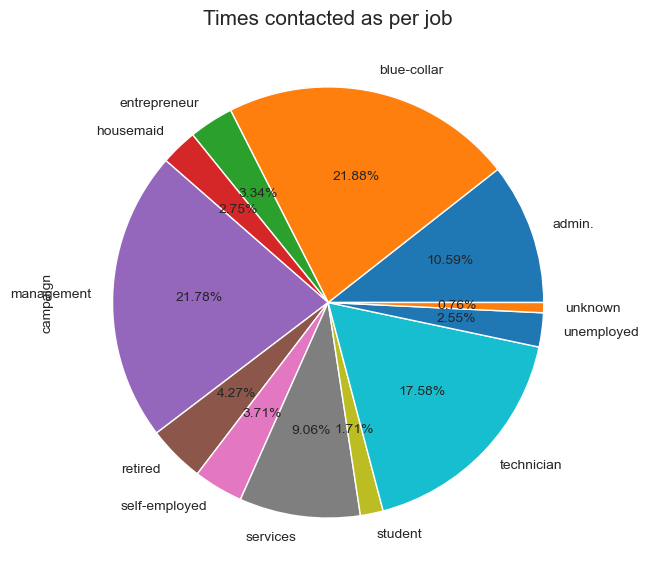

In [39]:
bank.groupby('job')['campaign'].sum().plot(kind='pie',figsize=(10,7),autopct='%1.2f%%')  # config of count plot
plt.title('Times contacted as per job', fontsize=15)  # setting title and its size
plt.show() # visualizing the graph

bank       this is dataset with having unknown values

bank_new   this is dataset without having unknown values

### side by side comparison for categorical variables in bank and bank_new

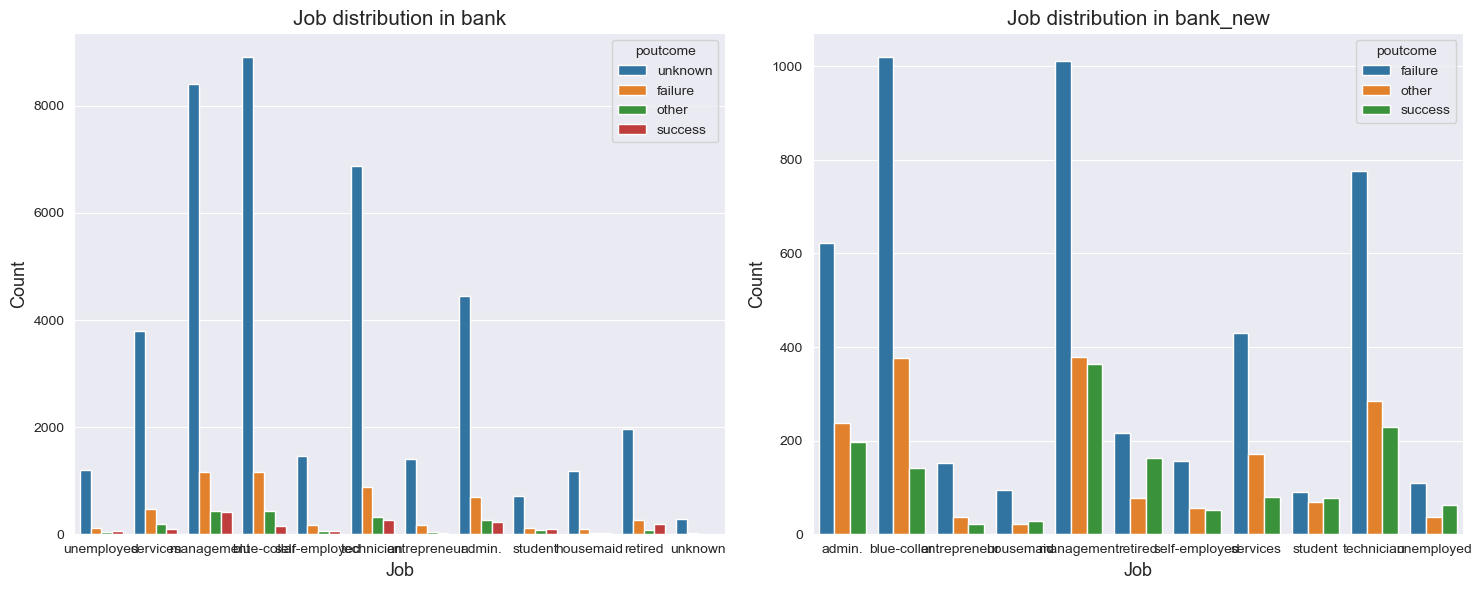

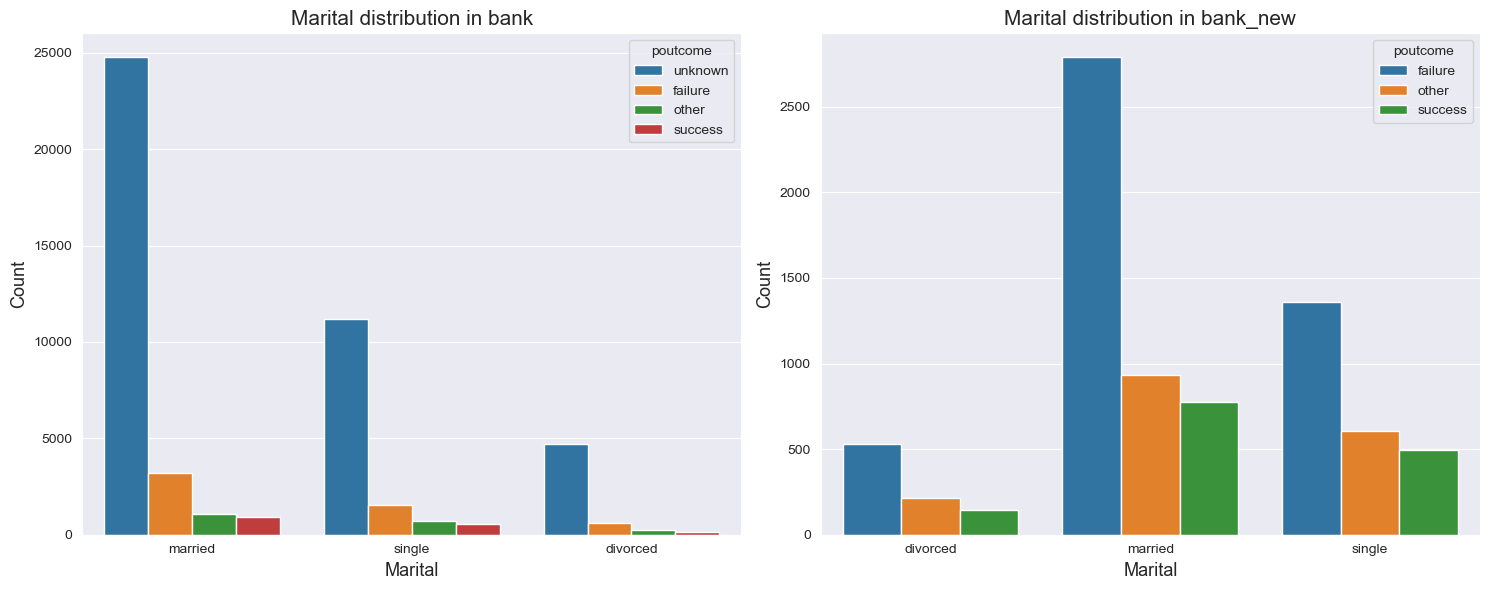

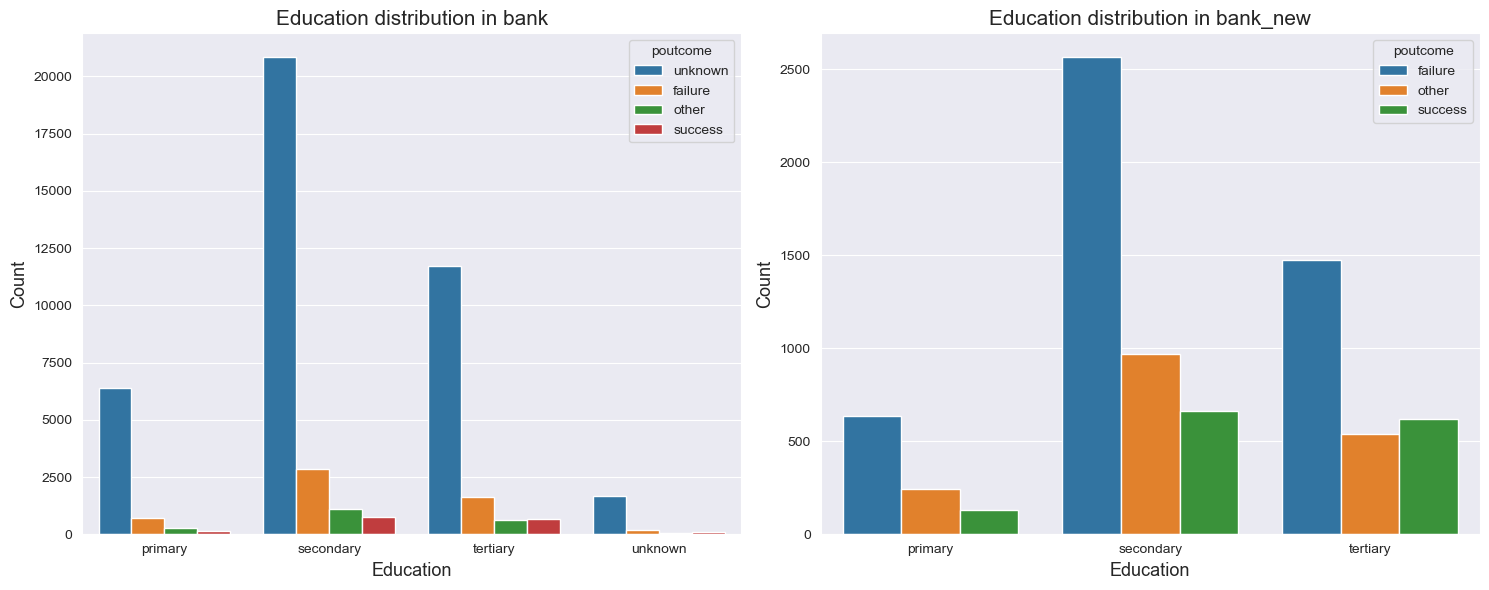

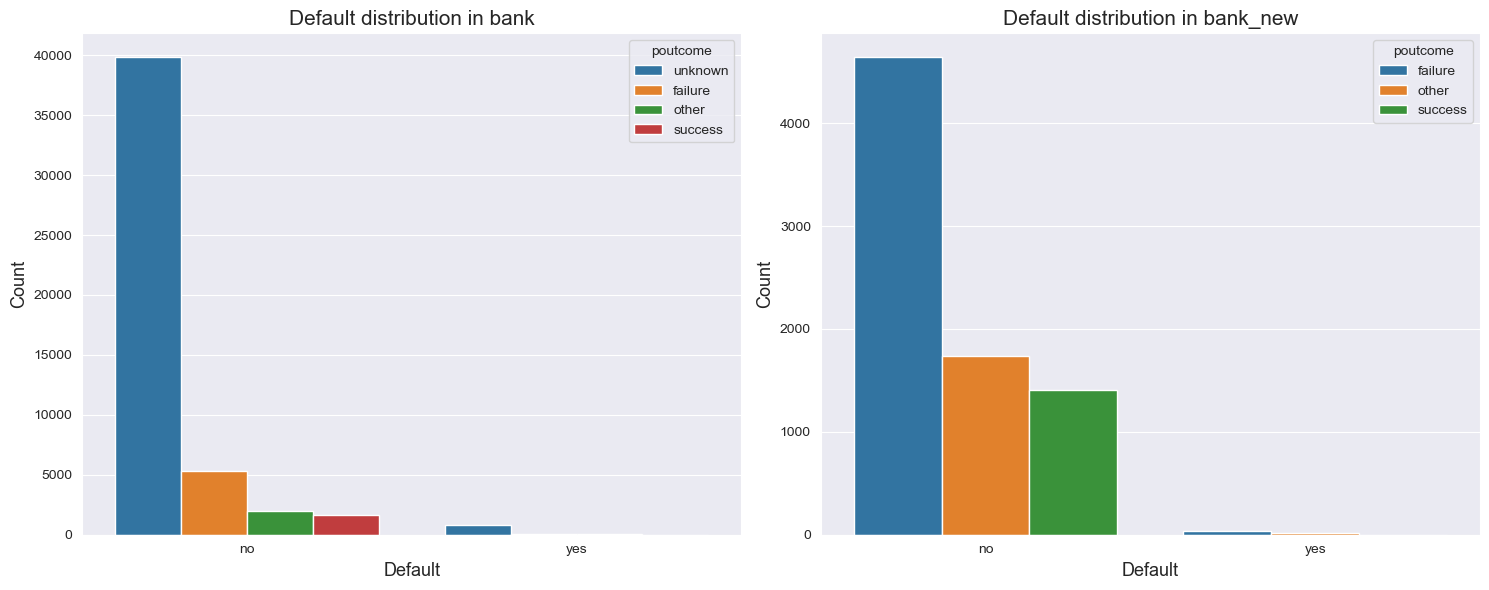

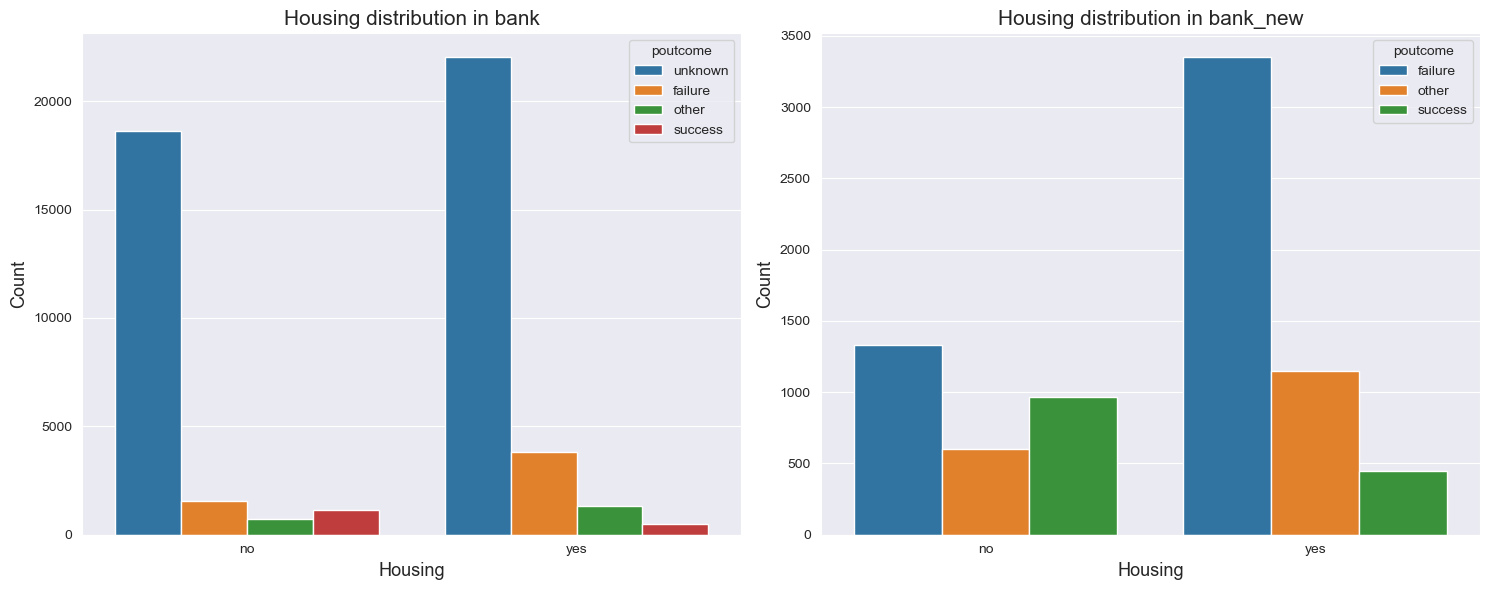

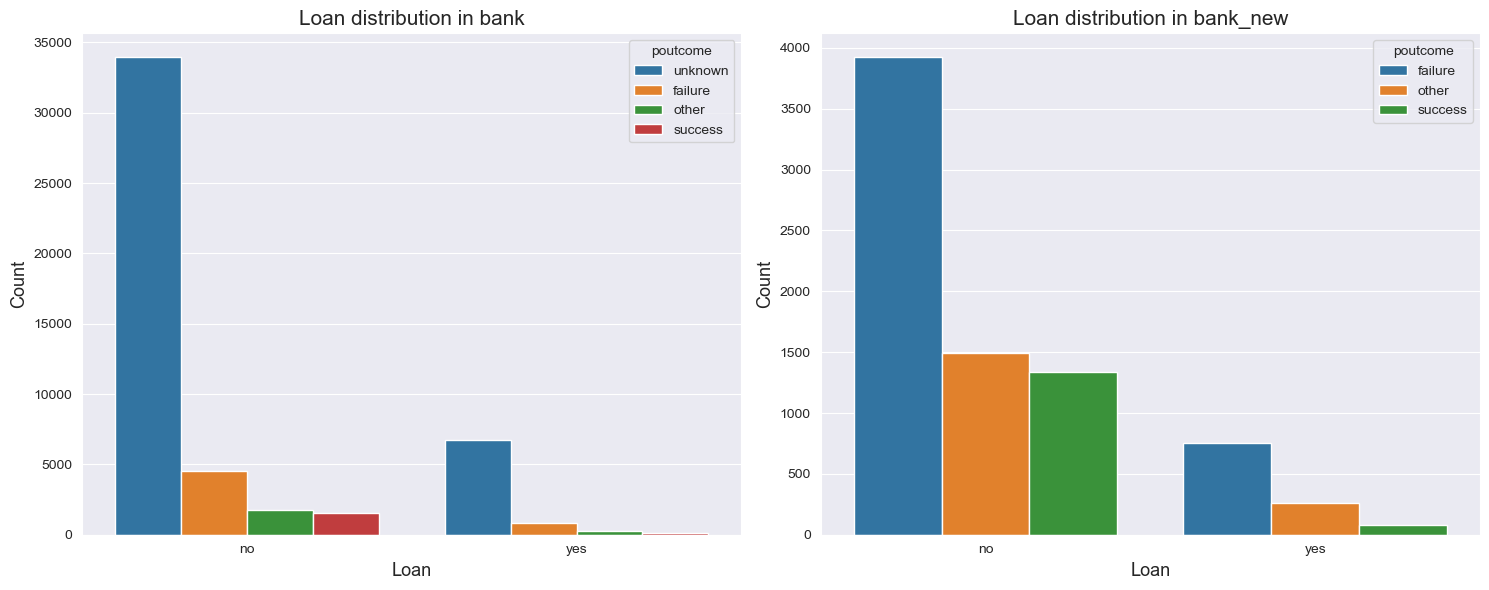

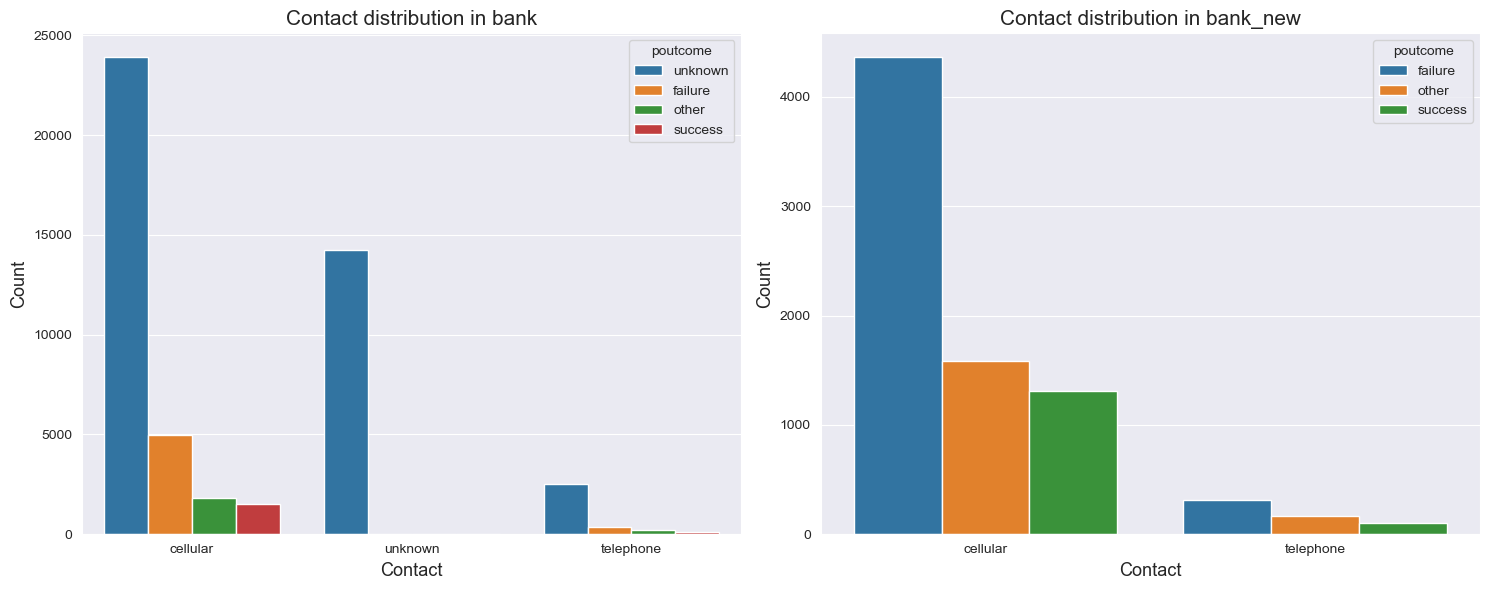

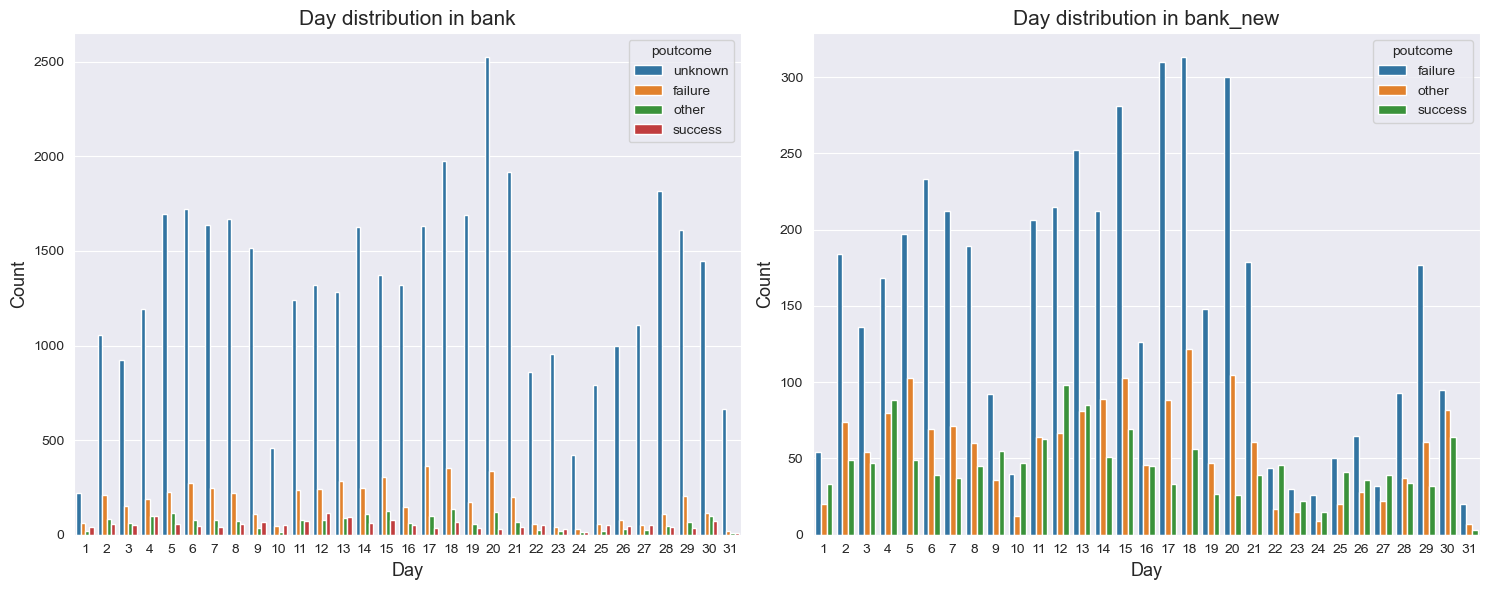

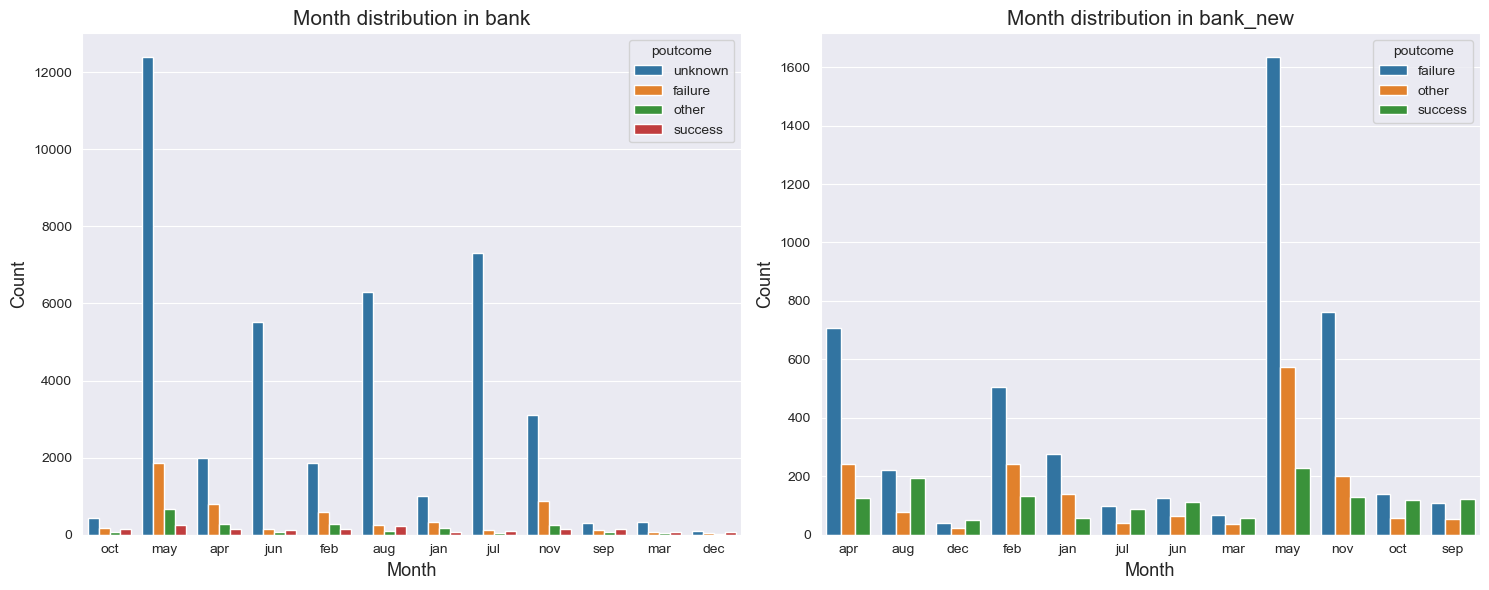

In [40]:
for i in cat_col: 
    if i == 'y' or i == 'poutcome': # it will skip y and potcome variable 
        continue
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
    sns.countplot(data=bank,x=i,hue='poutcome',ax=ax1) # countplot config
    ax1.set_xlabel(f'{i.capitalize()}', fontsize=13) # x label
    ax1.set_ylabel('Count', fontsize=13)# y label
    ax1.set_title(f'{i.capitalize()} distribution in bank', fontsize=15) # 1st column title
    ax1.tick_params(labelsize=10)

    sns.countplot(data=bank_new,x=i,hue='poutcome',ax=ax2) # countplot config
    ax2.set_xlabel(f'{i.capitalize()}', fontsize=13) # x label
    ax2.set_ylabel('Count', fontsize=13)# y label
    ax2.set_title(f'{i.capitalize()} distribution in bank_new', fontsize=15) # 1st column title
    ax2.tick_params(labelsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout() # compactness in visualization

#### Conclusion
- clients with no housing loans shows positive response in bank as well as bank_new dataset
- clients with management and technician jobs shows high success in bank_new which was not in bank
- clients contacted by cellular medium shows high success in both datasets 